In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from load_dataset import load_dataset
import time
%matplotlib inline 

In [2]:
x_train,t_train = load_dataset('./stop_train_dataset',convert_type='L',flatten=True,normalize=True,one_hot_label=True)
x_test,t_test = load_dataset('./stop_test_dataset',convert_type='L',flatten=True,normalize=True,one_hot_label=True)

Load label : Done!
Load img : Done!
Load label : Done!
Load img : Done!


In [3]:
X = tf.placeholder(tf.float32, shape=[None, 64*64],name="input")

In [4]:
stddev = np.sqrt(1.0 / 50*50)
h_W = tf.Variable(tf.truncated_normal([64*64,50*50], stddev=stddev)) 
h_b = tf.Variable(tf.constant(0.1, shape=[50*50]))
h_y = tf.nn.relu(tf.matmul(X, h_W) + h_b)

In [5]:
stddev = np.sqrt(1.0 / 64*64)
W = tf.Variable(tf.truncated_normal([50*50,64*64], stddev=stddev)) 
b = tf.Variable(tf.constant(0.1, shape=[64*64]))
y = tf.nn.xw_plus_b(h_y,W,b,name="output")

In [6]:
### 損失
loss = tf.reduce_mean(tf.pow(y - X, 2))

### 学習op
optimizer = tf.train.AdamOptimizer(1e-4)
train_step = optimizer.minimize(loss)

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 20
start = time.time()
for i in range(5000):
    batch_mask = np.random.choice(x_train.shape[0], batch_size)
    x_batch = x_train[batch_mask]
    sess.run(train_step,feed_dict={X: x_batch})
    if i % 1000 == 0:
        train_loss = sess.run(loss, feed_dict={X: x_train})
        print("[Train] step: %d, loss: %f" % (i, train_loss))
        print("Time : %f" % (time.time() - start))

[Train] step: 0, loss: 838931.750000
Time : 0.162354
[Train] step: 1000, loss: 5712.296875
Time : 91.641639
[Train] step: 2000, loss: 375.449921
Time : 184.118602
[Train] step: 3000, loss: 66.375992
Time : 276.673690
[Train] step: 4000, loss: 11.276419
Time : 368.438768


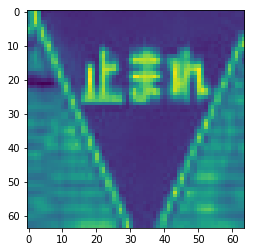

In [8]:
orig_img = np.array(x_train[5])
plt.imshow(orig_img.reshape(64, 64))

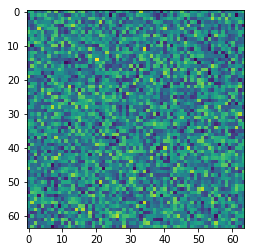

In [9]:
decode_img = sess.run(y, feed_dict={X:[orig_img]})
plt.imshow(decode_img.reshape(64, 64))

In [10]:
# もう少し学習させてみる
batch_size = 20
for i in range(5000):
    batch_mask = np.random.choice(x_train.shape[0], batch_size)
    x_batch = x_train[batch_mask]
    sess.run(train_step,feed_dict={X: x_batch})
    if i % 1000 == 0:
        train_loss = sess.run(loss, feed_dict={X: x_train})
        print("[Train] step: %d, loss: %f" % (i, train_loss))

[Train] step: 0, loss: 1.738044
[Train] step: 1000, loss: 0.323865
[Train] step: 2000, loss: 0.176448
[Train] step: 3000, loss: 0.160793
[Train] step: 4000, loss: 0.150064


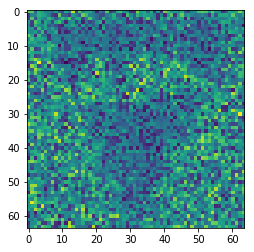

In [11]:
decode_img = sess.run(y, feed_dict={X:[orig_img]})
plt.imshow(decode_img.reshape(64, 64))

In [12]:
# もう少し学習させてみる
batch_size = 20
for i in range(5000):
    batch_mask = np.random.choice(x_train.shape[0], batch_size)
    x_batch = x_train[batch_mask]
    sess.run(train_step,feed_dict={X: x_batch})
    if i % 1000 == 0:
        train_loss = sess.run(loss, feed_dict={X: x_train})
        print("[Train] step: %d, loss: %f" % (i, train_loss))

[Train] step: 0, loss: 0.135942
[Train] step: 1000, loss: 0.118815
[Train] step: 2000, loss: 0.100534
[Train] step: 3000, loss: 0.083173
[Train] step: 4000, loss: 0.069099


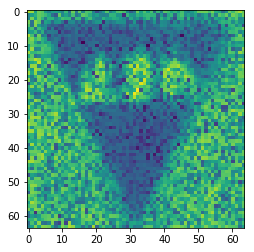

In [13]:
decode_img = sess.run(y, feed_dict={X:[orig_img]})
plt.imshow(decode_img.reshape(64, 64))

In [14]:
# もう少し学習させてみる
batch_size = 20
for i in range(5000):
    batch_mask = np.random.choice(x_train.shape[0], batch_size)
    x_batch = x_train[batch_mask]
    sess.run(train_step,feed_dict={X: x_batch})
    if i % 1000 == 0:
        train_loss = sess.run(loss, feed_dict={X: x_train})
        print("[Train] step: %d, loss: %f" % (i, train_loss))

[Train] step: 0, loss: 0.059134
[Train] step: 1000, loss: 0.053370
[Train] step: 2000, loss: 0.050479
[Train] step: 3000, loss: 0.049364
[Train] step: 4000, loss: 0.049042


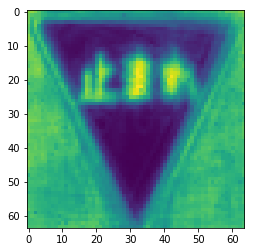

In [15]:
decode_img = sess.run(y, feed_dict={X:[orig_img]})
plt.imshow(decode_img.reshape(64, 64))

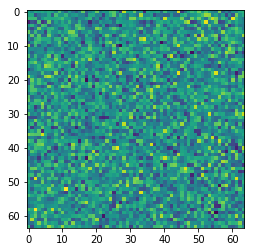

In [16]:
decode_img = sess.run(y, feed_dict={X:[x_test[3]]})
plt.imshow(decode_img.reshape(64, 64))